In [1]:
from sklearn.datasets import load_breast_cancer


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_scaled, y_train)


SVC(C=1, kernel='linear')

In [6]:
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train_scaled, y_train)


SVC(C=1)

In [7]:
print("Linear Kernel Results")
print(confusion_matrix(y_test, svm_linear.predict(X_test_scaled)))
print(classification_report(y_test, svm_linear.predict(X_test_scaled)))

print("RBF Kernel Results")
print(confusion_matrix(y_test, svm_rbf.predict(X_test_scaled)))
print(classification_report(y_test, svm_rbf.predict(X_test_scaled)))


Linear Kernel Results
[[41  2]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

RBF Kernel Results
[[41  2]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [8]:
scores = cross_val_score(svm_rbf, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average CV score:", scores.mean())


Cross-validation scores: [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
Average CV score: 0.9121720229777983


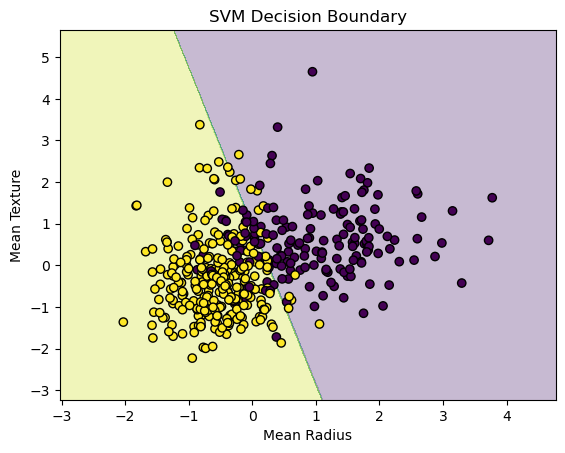

In [9]:
# Select 2 features only
X_vis = X[['mean radius', 'mean texture']]
X_vis_scaled = scaler.fit_transform(X_vis)
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis_scaled, y, test_size=0.2)

svm_2d = SVC(kernel='linear')
svm_2d.fit(X_train_vis, y_train_vis)

# Plotting decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel("Mean Radius")
    plt.ylabel("Mean Texture")
    plt.title("SVM Decision Boundary")
    plt.show()

plot_decision_boundary(svm_2d, X_train_vis, y_train_vis.to_numpy())
